# Ασαφής αλγόριθμος ομαδοποίησης $c$-μέσων (fuzzy $c$-means)

Ο αλγόριθμος προσπαθεί να ελαχιστοποιήσει τη συνάρτηση:
$$\sum_{j=1}^k \sum\limits_{x_i \in C_j} u_{ij}^m (x_i - c_j)^2 $$
όπου:

*   $u_{ij}$  είναι ο βαθμός συμμετοχής κατά τον οποίο το δείγμα $x_i$ ανήκει στη συστάδα  $c_j$ (membership)
*   $c_j$ είναι το κέντρο της συστάδας $j$
*   $m$ είναι ο ασαφοποιητής (fuzzyfier)

Μπορούμε να δούμε ότι ο $c$-means διαφέρει από τον $k$-means ως προς τον βαθμό συμμετοχής $u_{ij}$ και τον ασαφοποιητή $m$.

Η μεταβλητή $u_{ij}^m$ υπολογίζεται από τη σχέση
$$u_{ij}^m = \frac{1}{\sum\limits_{l=1}^k \left( \frac{| x_i - c_j |}{| x_i - c_k |}\right)^{\frac{2}{m-1}}}$$

Ο βαθμός συμμετοχής είναι αντίστροφα ανάλογος από την απόσταση από το κέντρο της ομάδας.

Στην ασαφή ομοδοποίηση το κέντρο κάθε ομάδας είναι ο μέση τιμή όλων των σημείων ζυγισμένο το καθένα με το βαθμό συμμετοχής του στην ομάδα:

$$c_j = \frac{\sum\limits_{x \in C_j} u_{ij}^m x}{\sum\limits_{x \in C_j} u_{ij}^m}$$

Ο αλγόριθμος ασαφούς ομαδοποίησης λειτουργεί ως εξής:

1. Ορίζουμε τον αριθμό των συστάδων $c$. (υπερπαράμετρος) 
2. Αναθέτουμε σε κάθε δείγμα τυχαίους συντελεστές συμμετοχής στις συστάδες. Πρέπει να αθροίζουν στο 1 για κάθε δείγμα.
3. Για τον μέγιστο αριθμό επαναλήψεων ή μέχρις ότου ο αλγόριθμος "συγκλίνει"  (δηλαδή οι συντελεστές αλλάζουν λίγοτερο από ένα κατώφλι $\epsilon$ επαναλαμβάνουμε:
- Υπολογίζουμε το κέντρο κάθε συστάδας.
- Για κάθε δείγμα, υπολογίζουμε το βαθμό συμμετοχής του σε όλες τις συστάδες.

Η παράμετρος $m$ είναι ένας πραγματικός αριθμός με τιμές μεγαλύτερες του 1 ($1.0<m<\infty$) και καθορίζει το βαθμό της ασάφειας. Μια τιμή κοντά στο 1 δίνει μια ομαδοποίηση κοντά στη σκληρή ομαδοποίηση του $k$-means, μια τιμή στο άπειρο οδηγεί σε μια ομαδοποίηση πλήρους ασάφειας. 

Στην πράξη η πιο συνηθισμένη τιμή είναι $m=2$

Τον c-means θα μας τον δώσει η βιβλιοθήκη scikit-fuzzy  [skfuzzy](https://pythonhosted.org/scikit-fuzzy/)


In [1]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=46bab9ddc328450cceef451fb4453aec8df887d8f9d54d1c3b58f997ecc5f562
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


## Δημιουργία ψευδοτυχαίων δεδομένων

Σημειώστε πως μπορούμε να ελέγχουμε την κατεύθυνση των Γκαουσιανών με τη διακύμανση που ορίζουμε στον κάθε άξονα (sigmas)

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

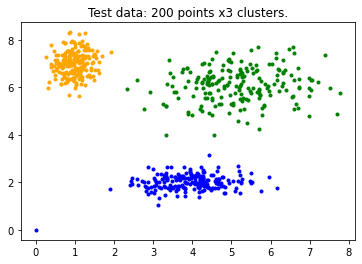

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Ορισμός των κέντρων των 3 συστάδων
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Ορισμός της διασποράς του κάθε κέντρου στις διαστάσεις x και y αντίστοιχα
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Δημιουργία δοκιμαστικών δεδομένων
np.random.seed(42)  # Σταθερή σπορά
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Οπτικοποίηση των δοκιμαστικών δεδομένων
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

## Eύρεση του βέλτιστου αριθμού συστάδων $c$
Στο παράδειγμά μας έχουμε φτιάξει ελεγχόμενα 3 συστάδες. Σε ένα κανονικό πρόβλημα όμως δεν γνωρίζουμε από πριν τον ακριβή αριθμό τους. Σημειώστε επίσης ότι στα παραδείγματά μας έχουμε μόνο δυο διαστάσεις, ένα τυπικό πρόβλημα έχει πολύ περισσότερες.

Θα τρέξουμε τον αλγόριθμο για $c$ από 2 μέχρι 10 συστάδες:

(2, 601) (2, 2)
(3, 601) (3, 2)
(4, 601) (4, 2)
(5, 601) (5, 2)
(6, 601) (6, 2)
(7, 601) (7, 2)
(8, 601) (8, 2)
(9, 601) (9, 2)
(10, 601) (10, 2)


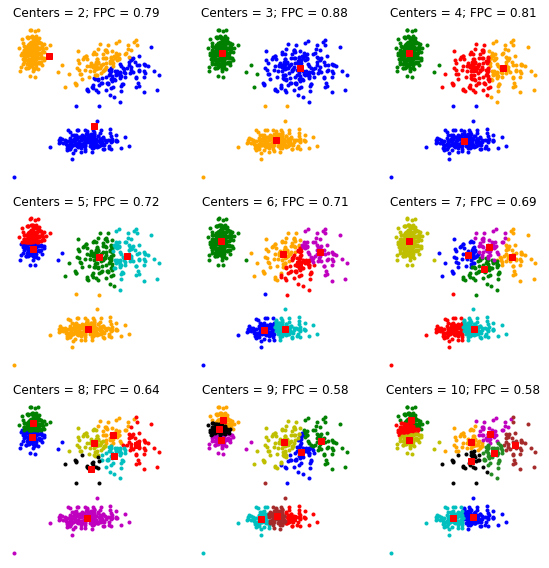

In [3]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    print(u.shape, cntr.shape)
    # Αποθήκευση των τιμών του συντελεστή ασάφειας διαμερισμού
    fpcs.append(fpc)

    # Σχεδιασμός των ανατιθέμενων συστάδων, γιά κάθε δείγμα δεδομένων
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Σημείωση του κέντρου της κάθε ασαφούς συστάδας
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
d
fig1.tight_layout()

Και θα χρησιμοποιήσουμε τον συντελεστή ασάφειας του διαμερισμού (fuzzy partition coefficient) ή συντελεστή Dunn

$$ F(U) = \frac{1}{n} \sum\limits_{i=1}^k\sum\limits_{j=1}^nu_{ij}^2$$

που είναι το άθροισμα των τετραγώνων όλων των βαθμών συμμετοχής δια του πλήθους των σημείων. Ο συντελεστής Dunn παίρνει τιμές

$$\frac{1}{k} \leq F(U) \leq 1$$

Το κάτω όριο επιτυγχάνεται όταν όλοι οι βαθμοί συμμετοχής είναι $\frac{1}{k}$ (απόλυτη ασάφεια, όλα τα σημεία ανήκουν σε όλες τις συστάδες κατά τον ίδιο βαθμό) και το άνω ($1$) όταν έχουμε μόνο μία συστάδα (τετριμμένη περίπτωση).

Text(0, 0.5, 'Συντελεστής ασάφειας διαμερισμού')

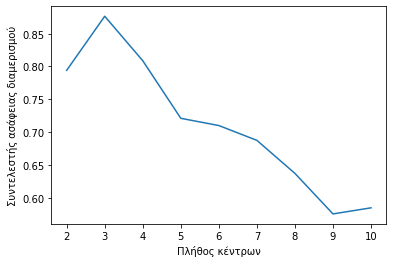

In [4]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Πλήθος κέντρων")
ax2.set_ylabel("Συντελεστής ασάφειας διαμερισμού")

Συνεπώς το βέλτιστο είναι c=3. Κάνουμε συσταδοποίηση με αυτή την τιμή

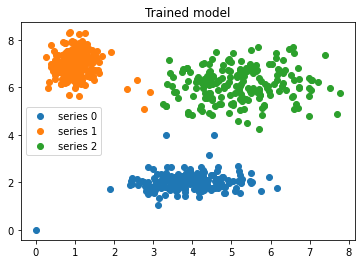

In [5]:
# Επανασυσταδοποίηση για 3 κέντρα συστάδων
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Εμφάνιση του αποτελέσματος
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

## Βαθμοί συμμετοχής τυχαίου σημείου
Για να δούμε πόσο ανήκει σε κάθε συστάδα ένα σημείο θα χρησιμοποιήσουμε τον πίνακα $u$

In [9]:
randompoint=10
print("τυχείο σημείο")
print(alldata[:,randompoint])
print("1 συστάδα    2 συστάδα  3 συστάδα")
print(u_orig[:,randompoint])

τυχείο σημείο
[4.43404803 3.15581945]
1 συστάδα    2 συστάδα  3 συστάδα
[0.83157629 0.04517197 0.12325175]


## Μειονεκτήματα

Ο αλγόριθμος c-means ελαχιστοποιεί τη διακύμανση εντός των ομάδων (intra-cluster variance) και μας δίνει τους βαθμούς συμμετοχής, έχει όμως τα ίδια προβλήματα με τον k-means:
* η βελτιστοποίηση καταλήγει σε ένα τοπικό ελάχιστο
* διαφορετική αρχικοποίηση δίνει διαφορετικά αποτελέσματα
* οι ομάδες έχουν αναγκαστικά κυκλικό σχήμα